<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/71_C_Datos_Regresion_Lineal_Manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo Ilustrativo. Se cuenta con las mediciones sobre la edad y la talla de 14 niños, y estamos interesados en determinar si existe algún tipo de relación entre la talla del niño y su edad**


## **Paso_1. Ingresamos los datos manual**

## **a. Nuestros datos**

In [71]:
Edad =	[3,	6,	5,	5,	3,	4,	9,	8,	9,	7,	6,	5,	8,	6]
Talla =	[55,	68,	64,	66,	62,	65,	74,	75,	73,	69,	73,	68,	73,	71]


## **b. Usando la libreria para crear el DataFrame**

In [72]:
import pandas as pd
Datos = pd.DataFrame({'x':Edad, 'y':Talla})
Datos

,x,y
0,3,55
1,6,68
2,5,64
3,5,66
4,3,62
5,4,65
6,9,74
7,8,75
8,9,73
9,7,69


# **Paso_2. Los Estadisticos que debemos calcular**


1.  $Suma(x)$, $$suma_x = \sum_{i=1}^{n}x_i=$$
2. $Suma(y)$,  $$suma_y = \sum_{i=1}^{n}y_i=$$
3. Variabilidad de $x$,   $$var_x =SC(x) = \sum_{i=1}^{n}(x_i-\bar{x})^2=\sum_{i=1}^{n}x_i^2-n\bar{x}^2$$

4. Variabilidad de $y$, $$var_y =SC(y)= \sum_{i=1}^{n}(y_i-\bar{y})^2=\sum_{i=1}^{n}y_i^2-n\bar{y}^2$$
5. Variabilidad conjunta de $x,y$, $$varc_{xy} =SC(xy)= \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})=\sum_{i=1}^{n}x_iy_i-n\bar{x}\bar{y}$$
6. Covarianza,  $$covarc_{xy} = \frac{varc_{xy}}{n-1}$$
7. Coeficiente de correlación de Pearson,  $$r = \frac{varc_{xy}}{\sqrt{var_x}\sqrt{var_y}}$$
8. Coeficiente de regresión,  $$b_1 = \frac{varc_{xy}}{{var_x}}$$
9. Coeficiente de regresión,  $$b_0 = \bar{y}-b_1\bar{x}$$
10. Modelo Estimado,  $$\widehat{y} = b_0+b_1x$$
11. Variabilidad Total, $$SCT= \sum_{i=1}^{n}(y_i-\bar{y})^2=\sum_{i=1}^{n}y_i^2-n\bar{y}^2$$
12. Variabilidad Modelo, $$SCR= \sum_{i=1}^{n}(\widehat{y_i}-\bar{y})^2$$
13. Variabilidad Error, $$SCE= SCT - SCR= \sum_{i=1}^{n}(y_i-\widehat{y_i})^2$$




## **a. El Total y la media de la variable independiente**

In [73]:
sum_x = Datos['x'].sum()
media_x = Datos['x'].mean()
print(f'suma(x) = {sum_x} y la media(x) = {media_x}')

suma(x) = 84 y la media(x) = 6.0


## **b. El Total y la media de la variable dependiente**

In [74]:
sum_y = Datos['y'].sum()
media_y = Datos['y'].mean()
print(f'suma(y) = {sum_y} y la media(y) = {media_y}')

suma(y) = 956 y la media(y) = 68.28571428571429


## **c. Agregamos una columna que contenga el producto de las variables $xy$**

In [75]:
Datos['xy'] = Datos['x']*Datos['y']
Datos

,x,y,xy
0,3,55,165
1,6,68,408
2,5,64,320
3,5,66,330
4,3,62,186
5,4,65,260
6,9,74,666
7,8,75,600
8,9,73,657
9,7,69,483


## **d. El Total para el producto $xy$**

In [76]:
sum_xy = Datos['xy'].sum()
sum_xy
print(f'suma(xy) = {sum_xy} ')

suma(xy) = 5863 


## **e. Agregamos una columna que contenga a $x^2$**

In [77]:
Datos['x^2'] = Datos['x'].apply(lambda x:x**2)
Datos

,x,y,xy,x^2
0,3,55,165,9
1,6,68,408,36
2,5,64,320,25
3,5,66,330,25
4,3,62,186,9
5,4,65,260,16
6,9,74,666,81
7,8,75,600,64
8,9,73,657,81
9,7,69,483,49


## **f. Total de la columna $x^2$**

In [78]:
sum_x2 = Datos['x^2'].sum()
sum_x2
print(f'suma(x2) = {sum_x2} ')

suma(x2) = 556 


## **g. Los Coeficientes de regresion**

In [79]:
# Coeficientes de regresion
n = 14
b1 = (n*sum_xy -sum_x*sum_y)/(n*sum_x2-sum_x**2)
b0 = media_y-b1*media_x
print(f'La pendiente de la recta de ajuste es b1 = {round(b1,2)}')
print(f'El intercepto de la recta de ajuste es b0 = {round(media_y-b1*media_x,2)}')
print('La recta de regresión estimada')
print('y_est = {0}*x+{1}'.format(round(b1,2),round(b0,2)))

La pendiente de la recta de ajuste es b1 = 2.44
El intercepto de la recta de ajuste es b0 = 53.63
La recta de regresión estimada
y_est = 2.44*x+53.63


## **h. Coeficiente de correlacion de Pearson**

$$r = b_1\frac{s_x}{s_y}$$

In [92]:
correlación = b1*Datos['x'].std()/Datos['y'].std()
print(f'el coeficiente de correlacion es r = {correlación}')

el coeficiente de correlacion es r = 0.8774583577966604


# **Paso_3. Tabla Anova**


## **a. Estructura de la Tabla Anova**

|Fuente|SC|g.l|MS|F|p_value|
|:--:|:--:|:--:|:--:|:--:|:--:|
|Regresión|SSR|1|MSR=SSR/1|MSR/MSE|-|
|Error|SSE|n-2|MSE=SSE/(n-2)|-|-|
|Total|SST|n-1|-|-|-|



## **b. Agregamos los valores estimados $y_{est}$ por el modelo a la Tabla**

In [80]:
Datos['y_est'] = b0+b1*Datos['x']
Datos

,x,y,xy,x^2,y_est
0,3,55,165,9,60.958791
1,6,68,408,36,68.285714
2,5,64,320,25,65.843407
3,5,66,330,25,65.843407
4,3,62,186,9,60.958791
5,4,65,260,16,63.401099
6,9,74,666,81,75.612637
7,8,75,600,64,73.170330
8,9,73,657,81,75.612637
9,7,69,483,49,70.728022


## **c. Los residuos del modelo son**

In [81]:
Datos['residuo^2'] = (Datos['y']-Datos['y_est'])**2
Datos

,x,y,xy,x^2,y_est,residuo^2
0,3,55,165,9,60.958791,35.507193
1,6,68,408,36,68.285714,0.081633
2,5,64,320,25,65.843407,3.398148
3,5,66,330,25,65.843407,0.024521
4,3,62,186,9,60.958791,1.084116
5,4,65,260,16,63.401099,2.556485
6,9,74,666,81,75.612637,2.600599
7,8,75,600,64,73.170330,3.347694
8,9,73,657,81,75.612637,6.825874
9,7,69,483,49,70.728022,2.986060


## **d. Anova - Variabilidad de Modelo y Cuadrado Medio $SSR$ y $MSR$**

In [82]:
SSR = ((Datos['y_est']-Datos['y'].mean())**2).sum()
MSR = SSR/1
print(f'La variabilidad del modelo es SSR = {SSR}')
print(f'La varianza del modelo es MSR = {MSR}')

La variabilidad del modelo es SSR = 310.173076923077
La varianza del modelo es MSR = 310.173076923077


## **e. Anova - Variabilidad del Error y Cuadrado Medio $SSE$ y $MSE$**

In [83]:
SSE = Datos['residuo^2'].sum()
MSE = SSE/(n-2)
print(f'La variabilidad del Error es SSE = {SSE}')
print(f'La varianza del Error es MSE = {MSE}')

La variabilidad del Error es SSE = 92.68406593406603
La varianza del Error es MSE = 7.723672161172169


## **f. Anova - Variabilidad Total y Varianza $SST$ y $MST$**

In [84]:
SST = ((Datos['y']-Datos['y'].mean())**2).sum()
MST = SST / (n-1)
print(f'La variabilidad total de los datos es SST = {SST}')
print(f'La varianza total de los datos es S^2 = {MST}')

La variabilidad total de los datos es SST = 402.85714285714283
La varianza total de los datos es S^2 = 30.989010989010985


## **g. El coeficiente de determinación del ajuste**

$$R^2 = 1- \frac{SSE}{SST}$$

In [94]:
R_2 = 1- SSE/SST
print(f'El coeficente de R_cuadrado es {R_2*100}')

El coeficente de R_cuadrado es 76.99331696672121


# **Paso_4. Dibujando la Tabla Anova**

|Fuente|SC|g.l|MS|F|p_value|
|:--:|:--:|:--:|:--:|:--:|:--:|
|Regresión|SSR|1|MSR=SSR/1|MSR/MSE|-|
|Error|SSE|n-2|MSE=SSE/(n-2)|-|-|
|Total|SST|n-1|-|-|-|


##  ***a. Análisis de Varianza - Usando Statgraphics***

|Fuente|	Suma de Cuadrados|	Gl	|Cuadrado Medio|	Razón-F|	Valor-P|
|:--:|:--:|:--:|:--:|:--:|:--:|
|Modelo	|310,173|	1	|310,173|	40,16|	0,0000
|Residuo|	92,6841	|12|	7,72367|
|Total (Corr.)|	402,857	|13



## **b. Instalando La librería Necesaria _texttable_**

In [85]:
!pip install texttable

## **c. El valor p, de la prueba**

In [86]:
from scipy import stats
F = stats.f(1,12)
valor_p = 1 - F.cdf(MSR/MSE)

## **d. Construyendo la Tabla Anova**

In [87]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Fuente','SS', 'g.l', 'MS', 'F', 'valor_p'],
           ['Regresión',	SSR,	1,	MSR,	MSR/MSE, valor_p],
           ['Error',	SSE,	n-2,	MSE, '', ''],
           ['Total',	SST,	n-1, '' , '', '']])
print(t.draw())

+-----------+---------+-----+---------+--------+---------+
|  Fuente   |   SS    | g.l |   MS    |   F    | valor_p |
+===========+=========+=====+=========+========+=========+
| Regresión | 310.173 | 1   | 310.173 | 40.159 | 0.000   |
+-----------+---------+-----+---------+--------+---------+
| Error     | 92.684  | 12  | 7.724   |        |         |
+-----------+---------+-----+---------+--------+---------+
| Total     | 402.857 | 13  |         |        |         |
+-----------+---------+-----+---------+--------+---------+


# **Paso_5. Comparando con _statsmodels_**

## **a. Importamos la Librería statsmodels y calculamos nuestro modelo**

In [88]:
import statsmodels.formula.api as smf
regresion = smf.ols('y~x', Datos)
result = regresion.fit()
b0, b1 = result.params
print('b0 =',round(b0,2))
print('b1 =',round(b1,2))

b0 = 53.63
b1 = 2.44


## **b. Nuestra Tabla Anova**

In [89]:
import statsmodels.api as sm
anova = sm.stats.anova_lm(result, type = 2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,310.173077,310.173077,40.158757,0.000037
Residual,12.0,92.684066,7.723672,NaN,NaN


## **c. Turno para la gráfica**

Text(0, 0.5, 'Talla')

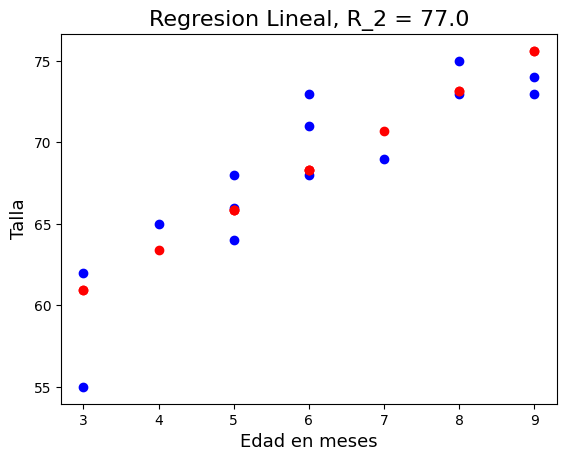

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
R_2 = round(r2_score(Datos['y'],Datos['y_est'])*100,1)

plt.scatter(Datos['x'], Datos['y'], color = 'blue')
plt.scatter(Datos['x'], Datos['y_est'], color = 'red')
plt.title(f'Regresion Lineal, R_2 = {R_2}', fontsize = 16)
plt.xlabel('Edad en meses', fontsize = 13)
plt.ylabel('Talla', fontsize = 13)